In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# a) Implement inversion sampling of the  Weibull distribution 

In [2]:
def weibull_cdf(x,scale,shape):
    """
    Compute the cummulative distribution function of the weibull distribution
    
    Arguments:
        x (np.array or float): parameter/range of values at which evaluate the cummulative distribution function
        scale(float):Scale parameter for weibull distribution
        shape(float):Shape parameter for weibull distribution
    
    Returns(np.array or float): The cummulative distribution function values at the specified  distribution at the specified range/value.
    
    Reference: 
        Rdocumentation: Cumulative Distribution Function of the Weibull Distribution
        More information: https://search.r-project.org/CRAN/refmans/lmomco/html/cdfwei.html
    
    Note: The location/zeta parameter is neglected to represent the generalized weibull distribution
    """
    if x>=0:
        return 1-np.exp(-(x/shape)**scale) 
    else:
        return 0
def weibull_cdf_inverse(distribution,scale,shape):
    """
    Function: Compute the quantile function of weibull cummulative distribution funcion
    
    Arguments:
        distribution(np.array): A distribution with input values ranging between 0 and 1
        scale(float): Scale parameter of the weibull distribution.
        shape(float): Shape parameter of the weibull distribution
    Returns:
        weibull_dist(np.array):Samples that form weibull distribution
    
    Reference: 
        Rdocumentation: Quantile Function of the Weibull Distribution
        More information: https://search.r-project.org/CRAN/refmans/lmomco/html/quawei.html
    
    Note: The location/zeta parameter is neglected to represent the generalized weibull distribution
    """
    weibull_dist=scale*(-np.log(1-distribution))**(1/shape)
    return weibull_dist

def weibull_inverse_sampling(n_samples,scale,shape,randomstate=0):
    """
    Function: Generate the samples of weibull distribution from uniform distribution.
    
    Arguments:
        n_samples(int): Number of samples to generate.
        scale(float):Scale parameter for weibull distribution
        shape(float):Shape parameter for weibull distribution
        random_state(int):Seed for radom generation of uniform distribution 
    Returns:
        weibull_dist(np.array): Generated samples of weibull distribution

    """
    # Fix the seed / randomstate for random number generator
    np.random.seed(randomstate)
    
    # Generate "n_samples" uniformly distributed samples with the range of 0 and 1
    uniform_dist=np.random.uniform(0,1,n_samples)
    
    # Convert the uniform distribution to weibull distribution through weibull quantile function
    weibull_dist=weibull_cdf_inverse(uniform_dist,scale,shape)
    
    return weibull_dist

# b)Sample 25 points of the Wei(5, 2) distribution and estimate its mean

In [3]:
weibull_dist=weibull_inverse_sampling(n_samples=25,scale=5,shape=2,randomstate=0)
estimated_mean=weibull_dist.mean()
print(f"b) The estimated mean of Weibull distribution with shape=5,scale=2,random_state=0 is {estimated_mean}")

b) The estimated mean of Weibull distribution with shape=5,scale=2,random_state=0 is 5.069179385454998


# c) Repeat this process for 1,000 times and store each time the estimates for the mean. 

In [4]:
# Repeating the process(i.e with 25 samples and lamda 5 and scale parameter(k) as 2) for 1000 random states and 
# storing the means for each randomstate of the weibull distribution in list
n_times=1000

# Compute the estimated means for the first 1000 random states with samples=25,lamda=5 and scale parrameter(k)=2
estimated_means=[weibull_inverse_sampling(n_samples=25,scale=5,shape=2,randomstate=each_time).mean() for each_time in range(n_times)]

print(f"c) The estimated means for the first 1000 random states with samples=25,lamda=5 and scale parrameter(k)=2 are \n{pd.DataFrame(estimated_means)}")
print(100*"=")

c) The estimated means for the first 1000 random states with samples=25,lamda=5 and scale parrameter(k)=2 are 
            0
0    5.069179
1    3.922311
2    3.546502
3    3.780269
4    5.103491
..        ...
995  4.024161
996  4.030282
997  5.239463
998  4.902603
999  3.975423

[1000 rows x 1 columns]


## plot the histogram of the estimates

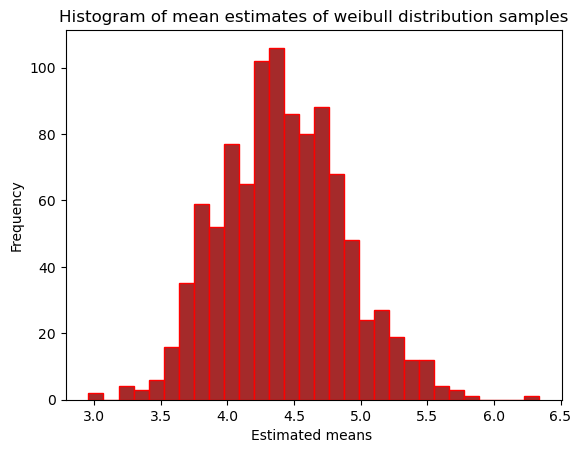

In [5]:
fig,axis=plt.subplots()
# Plotting the histogram to determine distribution of the mean estimates
plt.hist(estimated_means,bins=30,color="brown", edgecolor="red")

# Annotating the title,xaxis and yaxis for the histogram
axis.set_title("Histogram of mean estimates of weibull distribution samples")
axis.set_xlabel("Estimated means ")
axis.set_ylabel("Frequency")

plt.show()

## Which distribution do they follow asymptotically?

According to the central limit theorem, for sufficiently large number of  samples(n) the distribution of the average of independent and identically sdistrinuted samples follows a normal distribution irrespective of the initial distribution. So here, the estimated means of the weibull distributed samples should follow a Gaussuian/normal distribution as the number of samples increases asymptotically to infinity.